In [15]:
import sys
sys.path.append('../src')

from iecdt.genai import gemini
from glob import glob
import pickle
import matplotlib.pyplot as plt
import numpy as np

# select any image


In [16]:
descriptions_dir = '/opt/data/dora/embeddings/consolidated/'
files = glob(f'{descriptions_dir}/*.pkl')
len(files)

48313

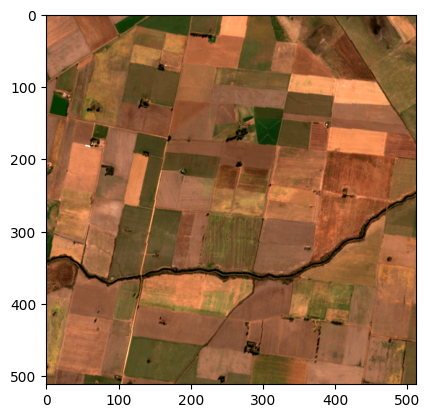

In [17]:
file = np.random.choice(files)
with open(file, 'rb') as f:
    z = pickle.load(f)
plt.imshow(z['img'])

In [22]:
print (gemini.best_gemini_generation_prompt)


You are analyzing a satellite image to create a comprehensive textual description for precise image retrieval from a vast da
tabase.  Your description will serve as a detailed visual fingerprint, enabling users to pinpoint this specific image among 
millions using text-based search queries.

Structure your description into the following categories, providing specific details for each:

* **Location and Extent:**  Describe the geographic area covered by the image if discernible (e.g., coordinates, region name
). Estimate the area covered by the image (e.g., square kilometers).

* **Dominant Land Cover:** Identify the most prominent land cover types (e.g., urban, forest, agricultural, water, barren) a
nd estimate the percentage of the image covered by each.

* **Terrain:** Describe the dominant terrain characteristics.  For each feature (mountains, valleys, plateaus, canyons, hill
s, coastlines, etc.), specify:
    - **Type:** (e.g., mountain range, valley, coastal plain)
    - **Locati

In [18]:
gem = gemini.GeminiMultimodalModel(api_key='../../secrets/gemini.txt')

In [19]:
descr = gem.generate_description_for_image(z['img'])


In [20]:
print (descr)

```json
{
  "agricultural_land": "95%",
  "river": "5%",
  "roads": "<1%",
  "buildings": "<1%"
}
```


**Location and Extent:**  The image depicts a rural agricultural area.  The exact location is unknown but appears to be a temperate region. The area covered is estimated to be a few square kilometers.

**Dominant Land Cover:** Agricultural land dominates the image, covering approximately 95% of the area. The remaining area consists of a river and associated riparian vegetation, roads, and a few scattered buildings.

**Terrain:** The terrain appears relatively flat to gently rolling, with no significant elevation changes or prominent features like mountains, valleys, or hills.

**Vegetation:** The dominant vegetation consists of cultivated fields appearing in various shades of brown and green, suggesting different crops or stages of growth.  These fields cover most of the image and display regular, rectangular shapes.  Linear patches of vegetation, presumably riparian vegetation, foll

## extended description (with geographical info)

In [25]:
print (z['description'])

This satellite image depicts a predominantly agricultural landscape with a meandering river and a network of roads and field boundaries.

**Terrain:** Relatively flat terrain with no significant elevation changes visible.

**Vegetation:**

* **Agricultural Fields:** Dominant feature covering most of the image.  Fields are predominantly rectangular and vary in color from light tan/brown to dark reddish-brown and green, indicating varying stages of growth or different crops.  A grid-like pattern of field boundaries is evident throughout.
* **Scattered Trees/Small Wooded Areas:** Small clusters of trees or small wooded areas are interspersed amongst the fields, particularly along the riverbanks and occasionally within or bordering the fields. These appear as darker, textured patches.

**Water Bodies:**

* **Meandering River:** A significant meandering river flows roughly from the southwest to the northeast across the image.  The river appears as a dark, sinuous line varying in width.  Its